In [1]:
!pip install colorthief scikit-learn matplotlib Pillow requests

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


In [2]:
from colorthief import ColorThief
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import json

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('RGBA')
    pixels = np.array(img)
    return img, pixels

def get_dominant_colours_skl(pixels):
    non_transparent_pixels = pixels[pixels[:, :, 3] > 0][:, :3].reshape(-1, 3)
    kmeans = KMeans(n_clusters=7, n_init='auto').fit(non_transparent_pixels)
    palette = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    label_counts = np.bincount(labels)
    total_count = len(labels)
    dominance_percentage = (label_counts / total_count) * 100
    return palette, dominance_percentage

def get_dominant_colours_ct(img_path):
    color_thief = ColorThief(img_path)
    palette = color_thief.get_palette(color_count=7, quality=1)
    return palette

def process_image(pixels):
    # Ensure the pixels array has the expected shape (height, width, 4)
    if len(pixels.shape) == 3 and pixels.shape[2] == 4:
        # Filter out pixels with Alpha channel > 0 and select the RGB channels
        return pixels[pixels[:, :, 3] > 0][:, :3]
    elif len(pixels.shape) == 2:
        # Handle grayscale or other unexpected cases
        # This is a placeholder; you'll need to adjust based on your specific needs
        return pixels
    else:
        raise ValueError("Unexpected shape of the pixels array. Expected (height, width, 4).")

def calculate_color_percentage(pixels, target_color, threshold=15):
    distances = np.sqrt(((pixels - target_color) ** 2).sum(axis=1))
    return np.mean(distances <= threshold) * 100

def optimize_and_execute(directory):
    heroes = []
    directory_list = sorted(os.listdir(directory))
    for file_name in directory_list:
        image_path = os.path.join(directory, file_name)
        img, pixels = load_and_preprocess_image(image_path)
        
        ct_palette = get_dominant_colours_ct(image_path)
        sk_palette, percents = get_dominant_colours_skl(pixels)
        palette = np.vstack([ct_palette, sk_palette])
        
        visible_pixels = process_image(pixels)
        percentages = [calculate_color_percentage(visible_pixels, color, 35) for color in palette]
        
        palette_and_percentage = list(zip(palette.tolist(), percentages))
        hero_obj = {
            "name": image_path.split('/')[-1].split('-')[0],
            "hero_image_path": image_path,
            "palette_with_percentage": palette_and_percentage
        }
        print(hero_obj)
        print_image_and_dominant_colours(img, palette, percentages)
        heroes.append(hero_obj)
    
    return heroes

def print_image_and_dominant_colours(image, palette, dominance_percentage=[]):
    """
    Displays the original image alongside its dominant colors and their respective dominance percentages.

    :param image: PIL Image object, the original image.
    :param palette: List of tuples/lists, the dominant colors in RGB format.
    :param dominance_percentage: List of floats, the dominance percentage of each color in the palette.
    """
    plt.figure(figsize=(15, 2 + len(palette) * 2))

    # Display the original image
    plt.subplot(1, len(palette) + 1, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Hero')

    # Display each dominant color and its dominance percentage
    for i, color in enumerate(palette):
        plt.subplot(1, len(palette) + 1, i + 2)
        plt.imshow([[color]])
        plt.axis('off')
        title = f"{dominance_percentage[i]:.2f}%" if dominance_percentage else ""
        plt.title(title)

    plt.show()

# Specify the directory
directory = '/home/markm/Pictures/dota2heroes'

heroes = optimize_and_execute(directory)

# Dump the list of hero objects to a JSON file
json_file_path = '/home/markm/dotaheroestest.json'
with open(json_file_path, 'w') as json_file:
    json.dump(heroes, json_file, indent=4)

print(f"Hero objects have been saved to {json_file_path}.")


Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: '/home/markm/Pictures/dota2heroes'

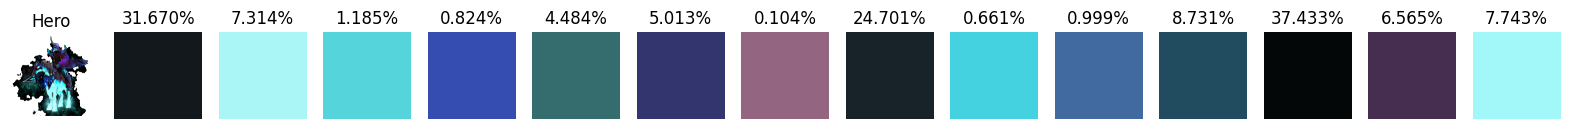

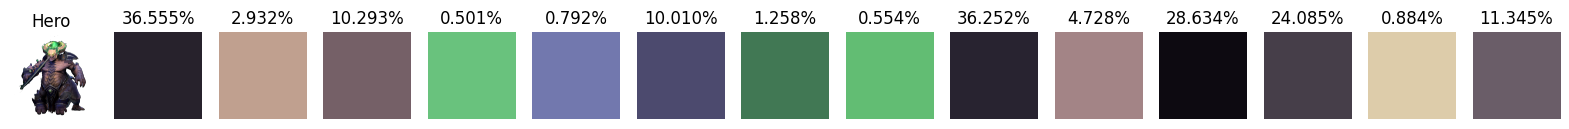

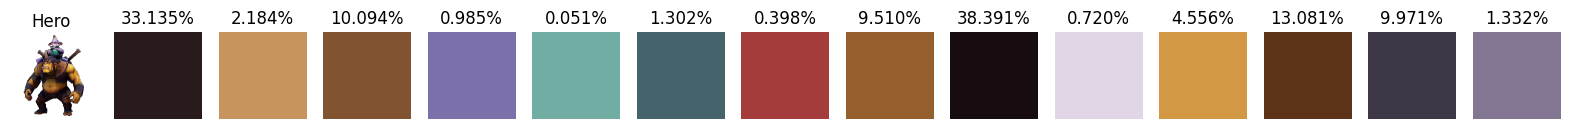

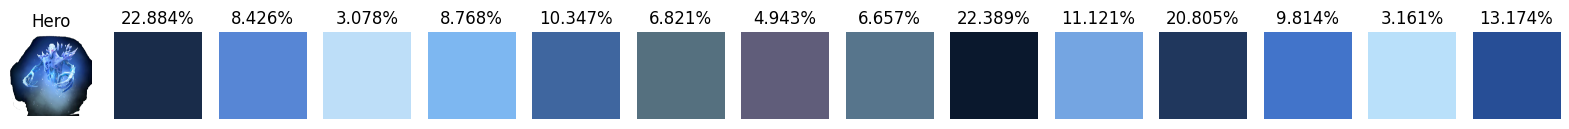

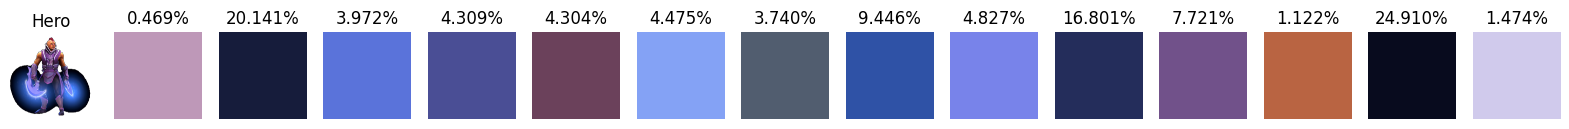

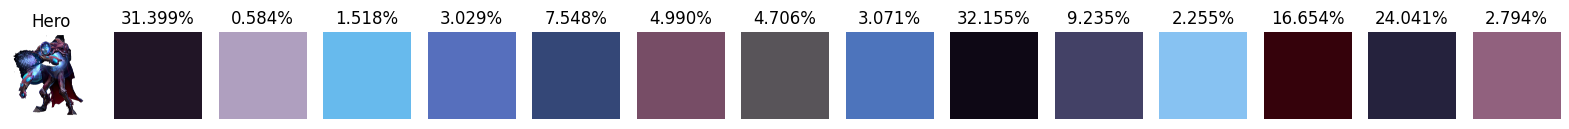

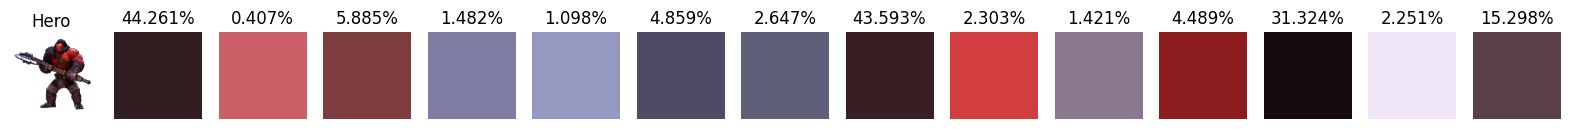

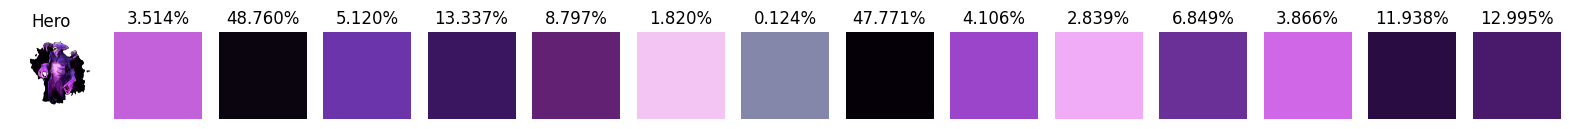

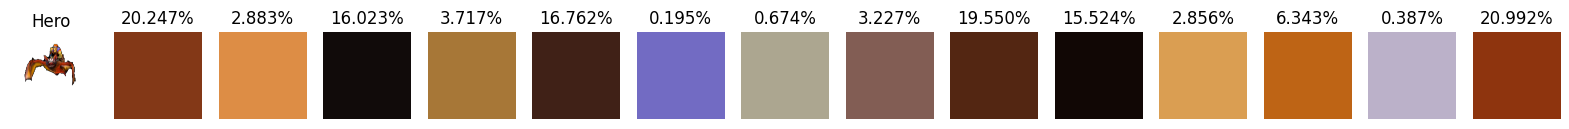

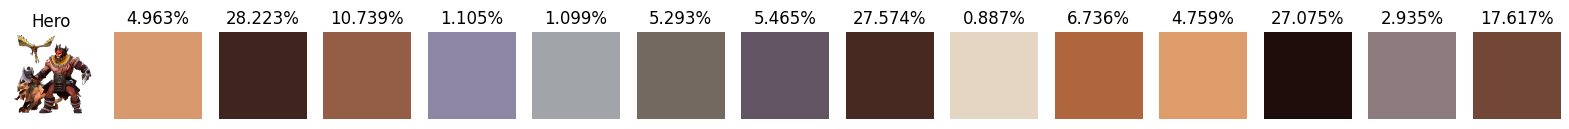

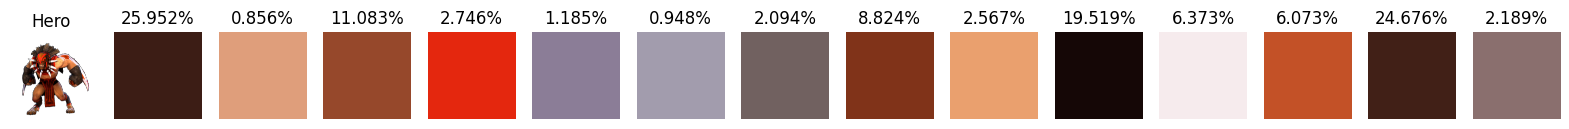

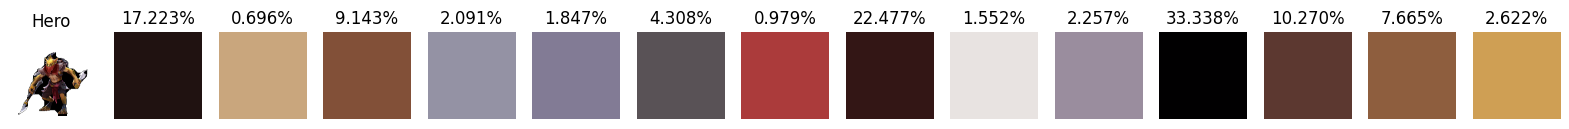

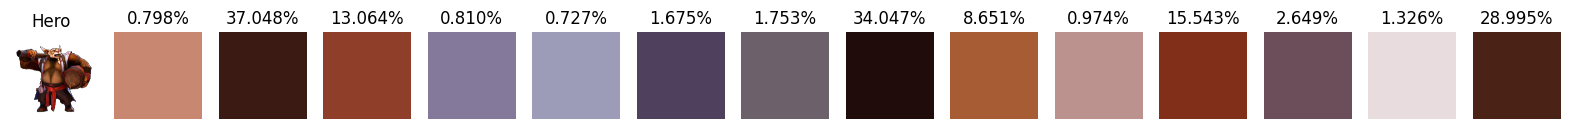

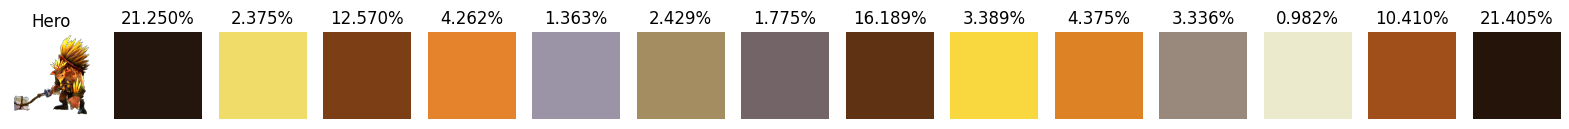

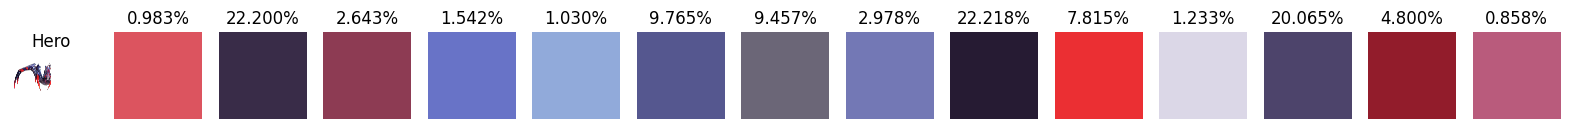

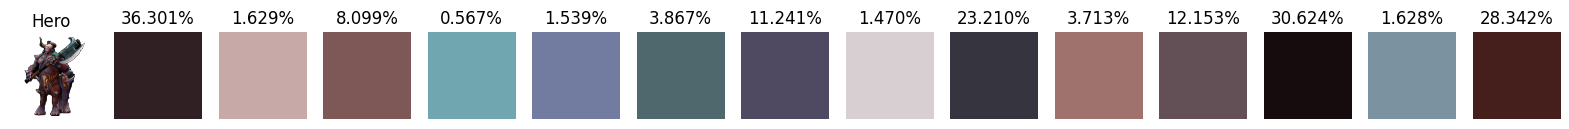

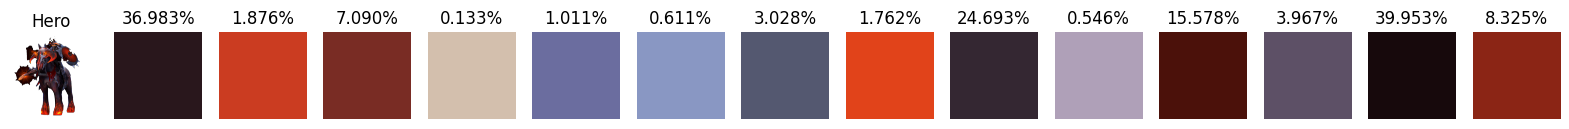

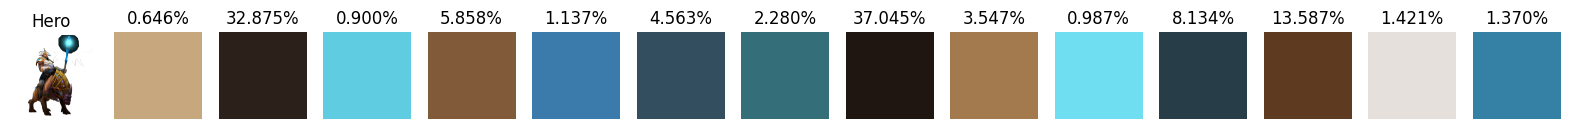

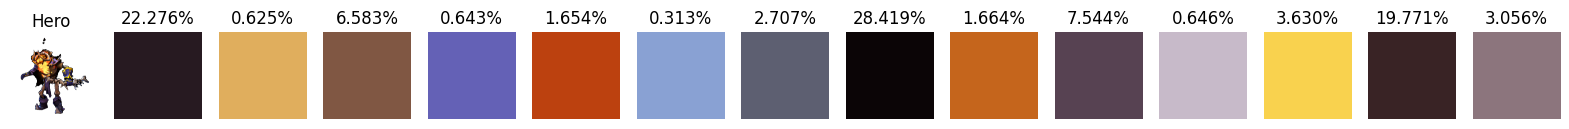

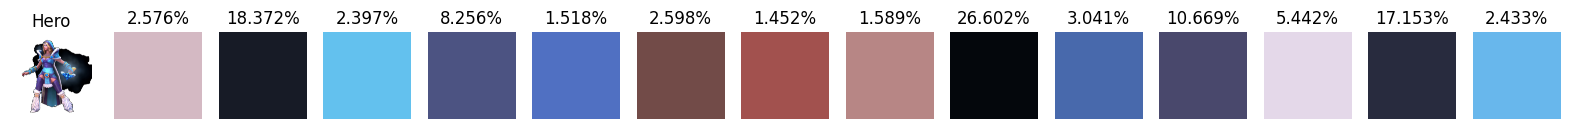

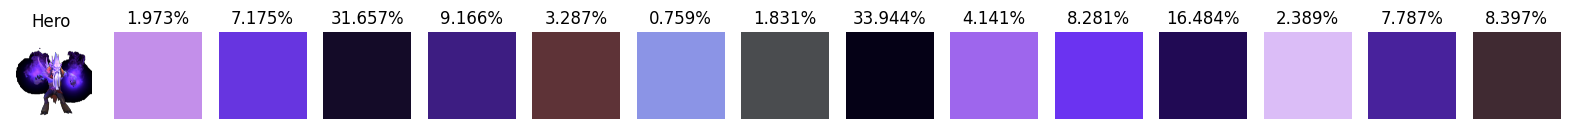

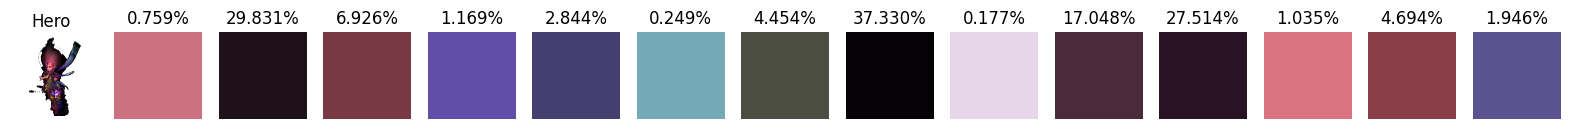

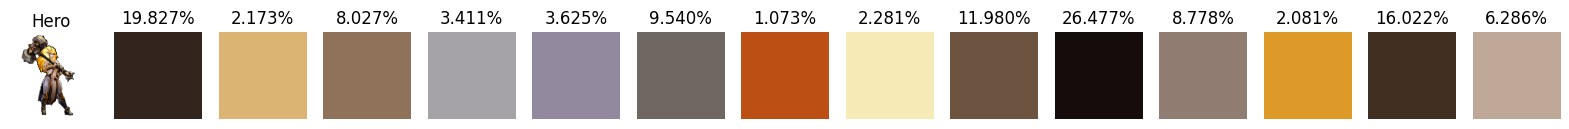

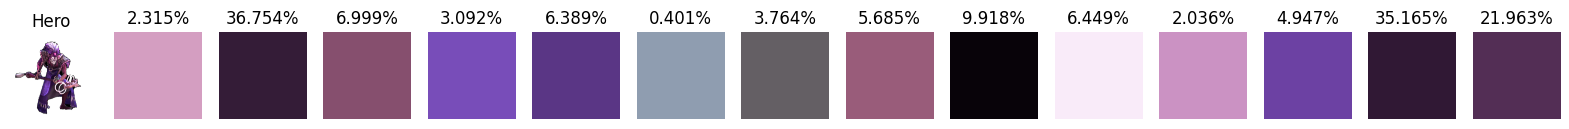

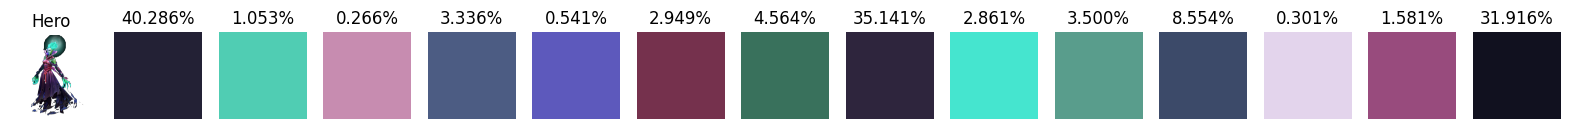

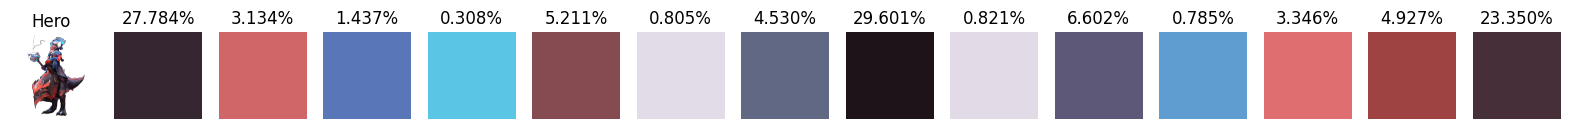

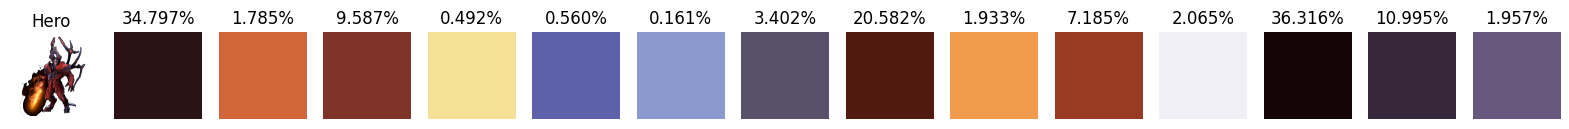

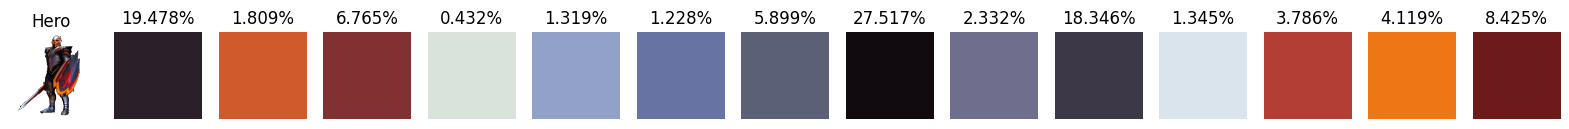

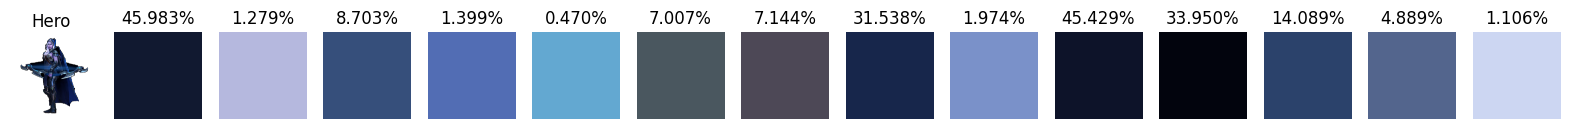

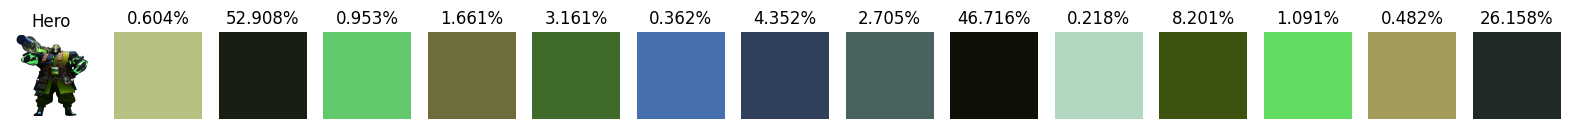

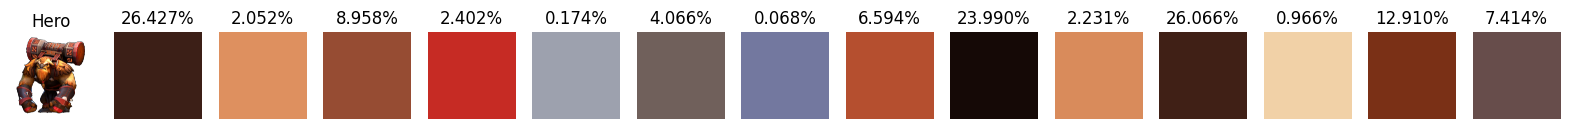

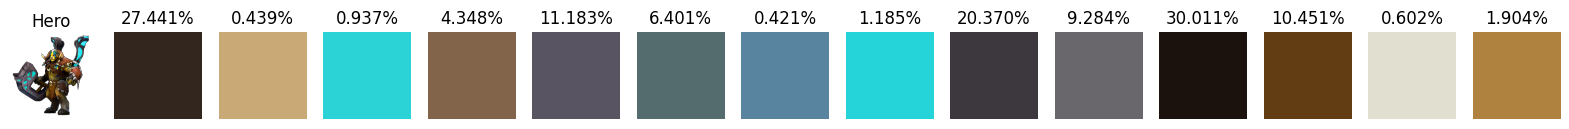

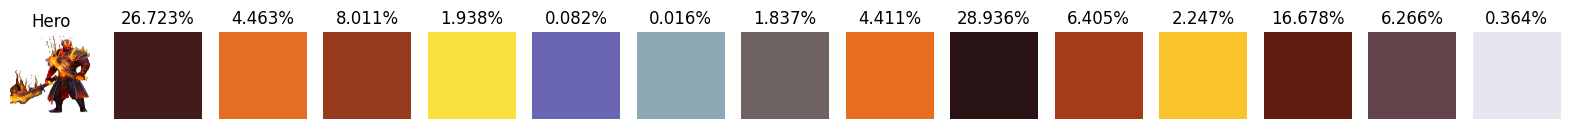

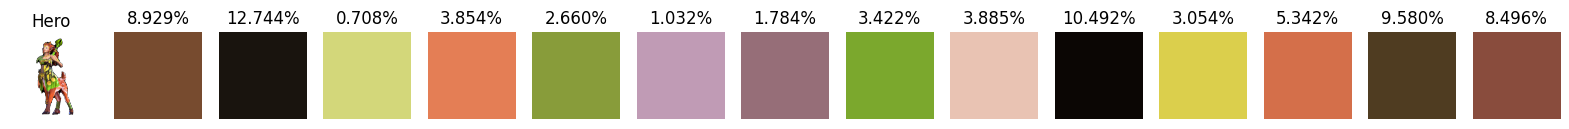

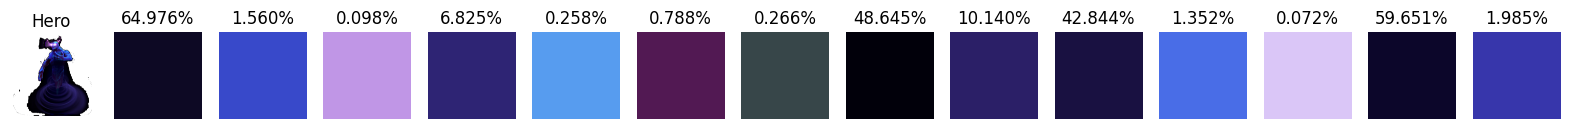

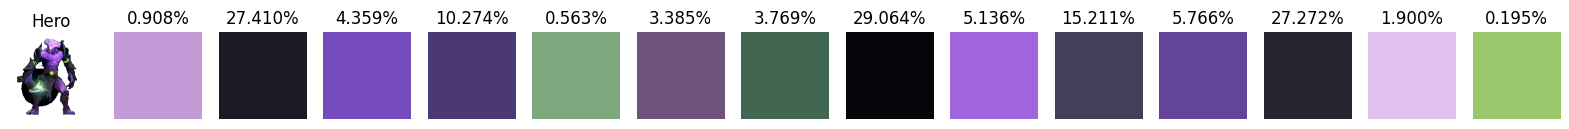

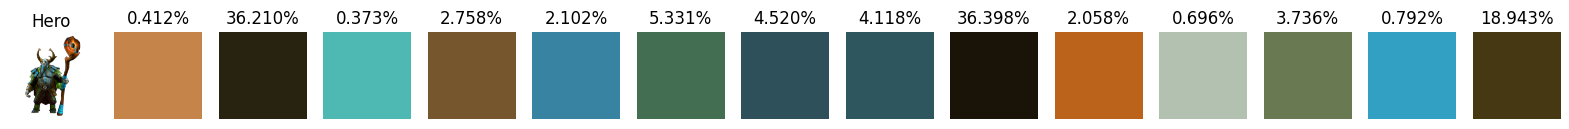

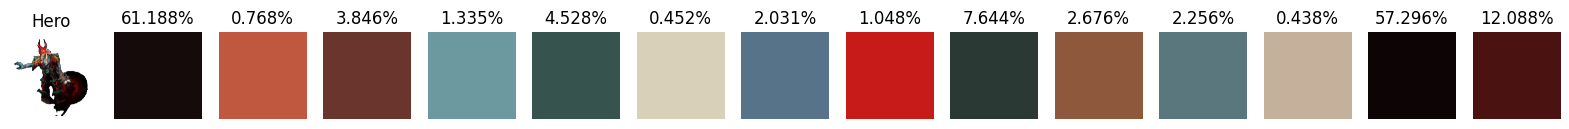

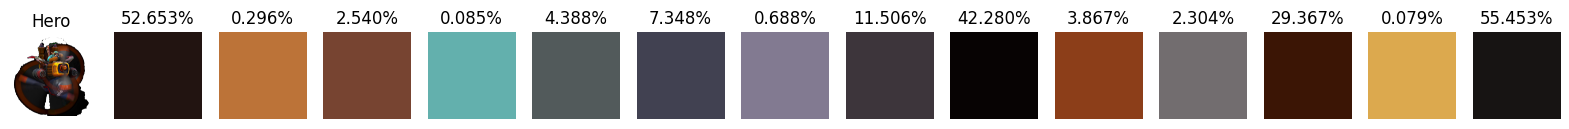

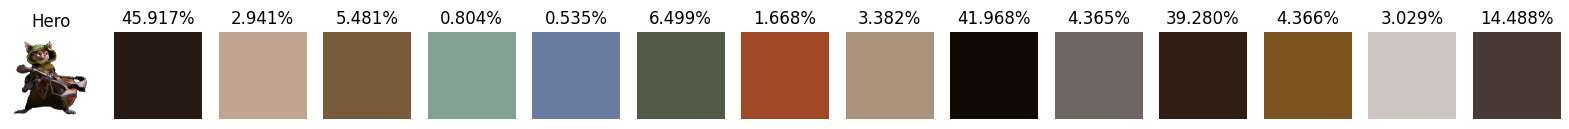

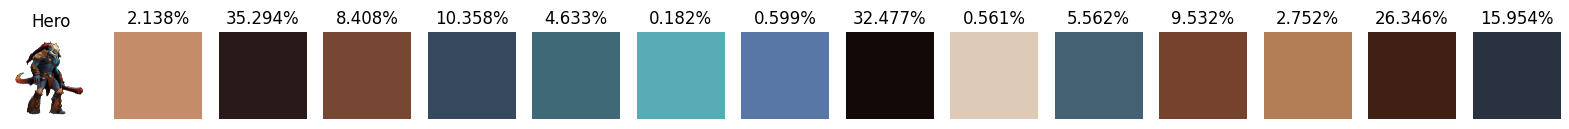

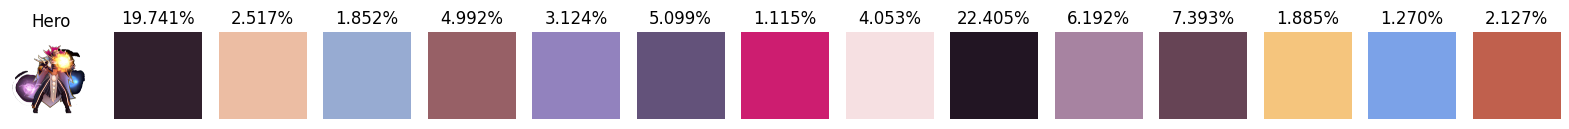

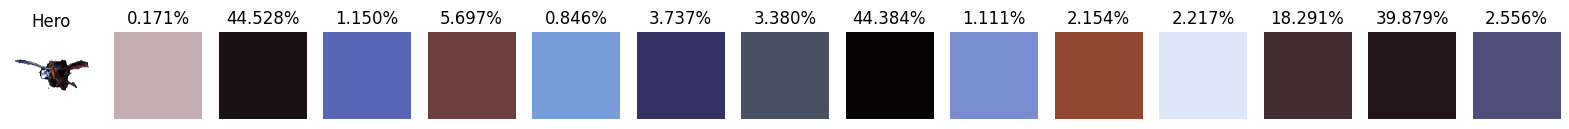

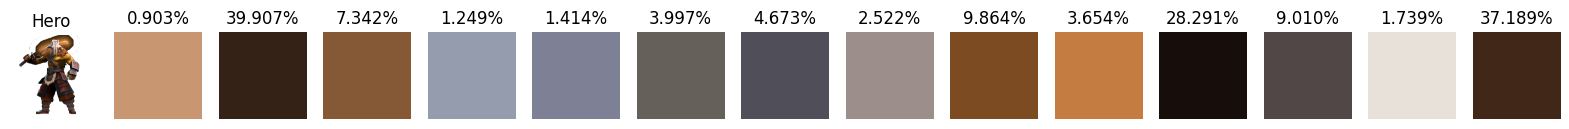

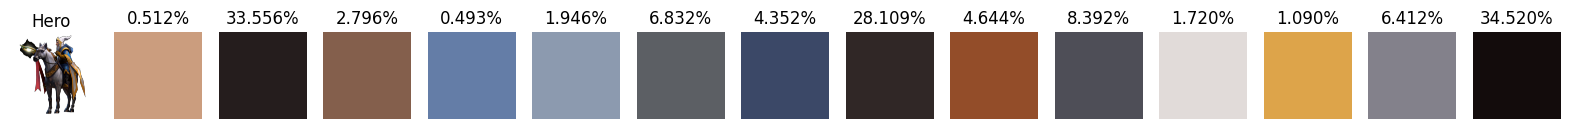

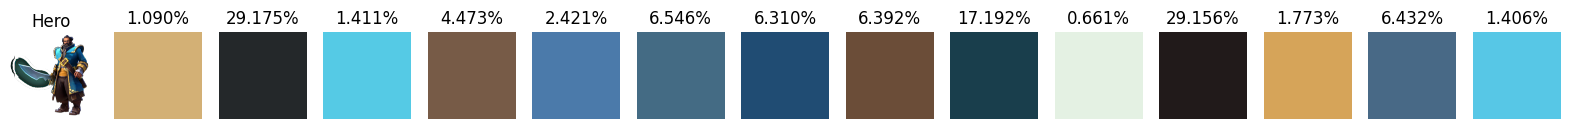

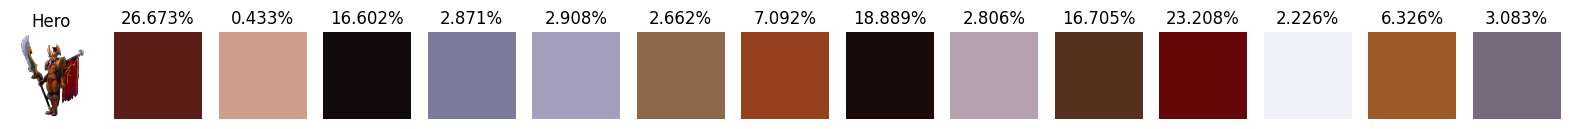

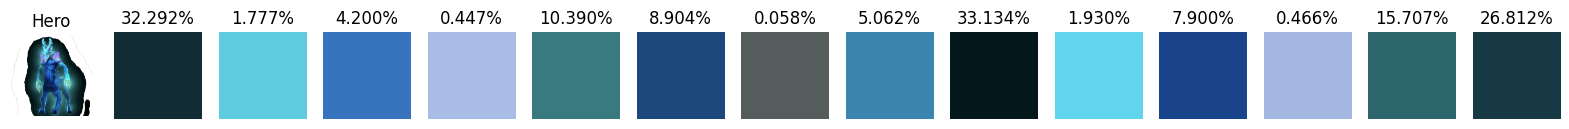

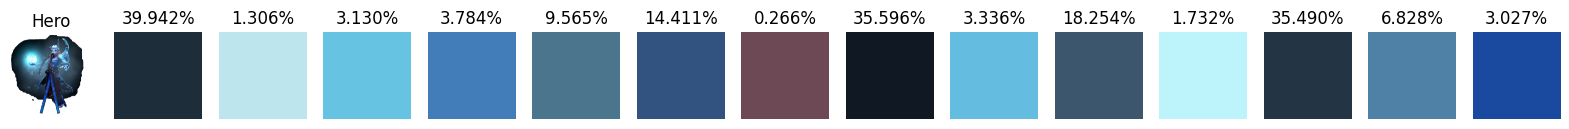

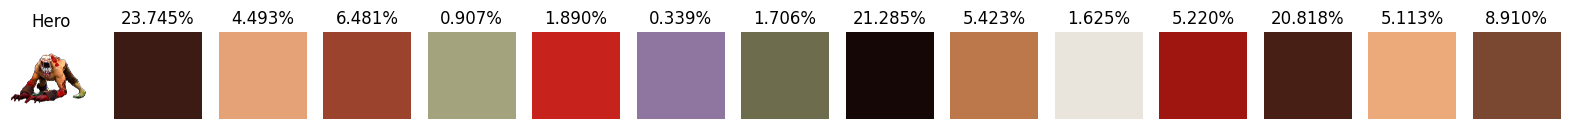

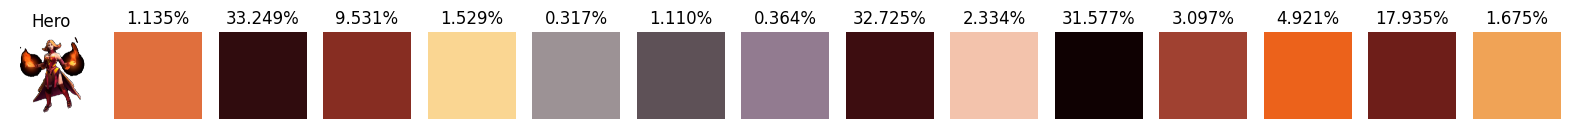

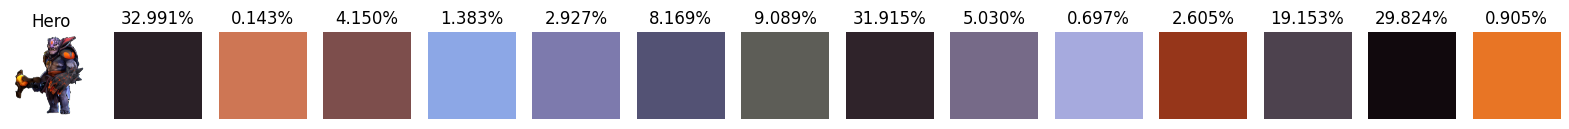

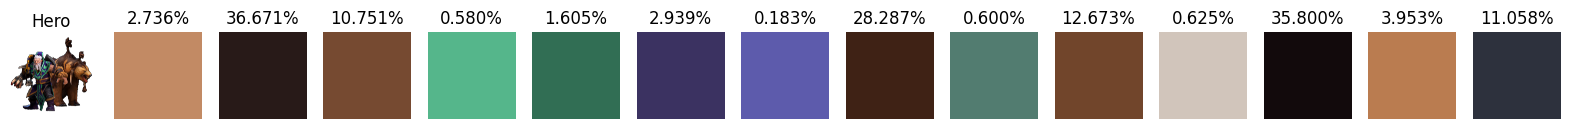

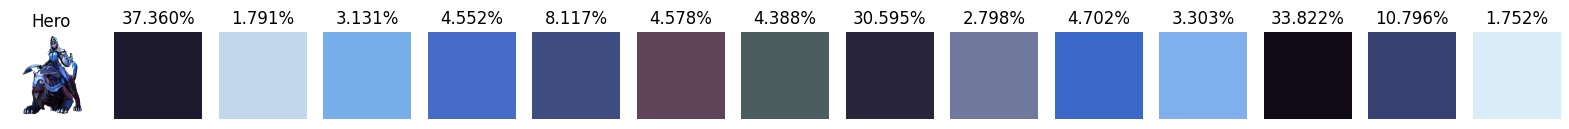

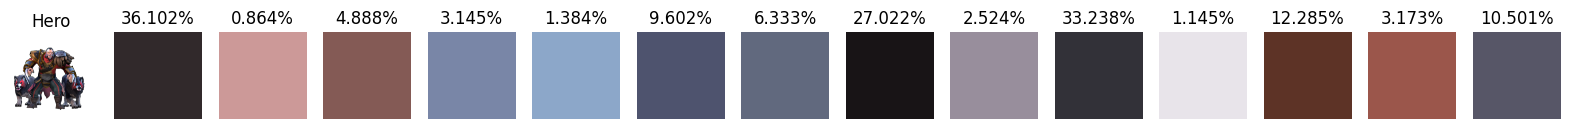

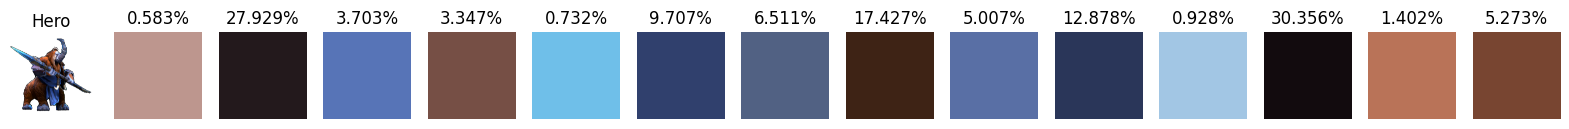

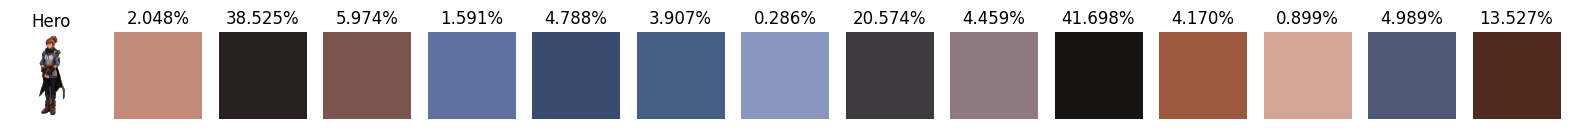

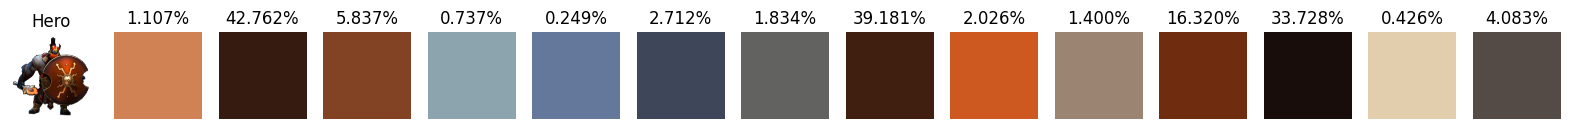

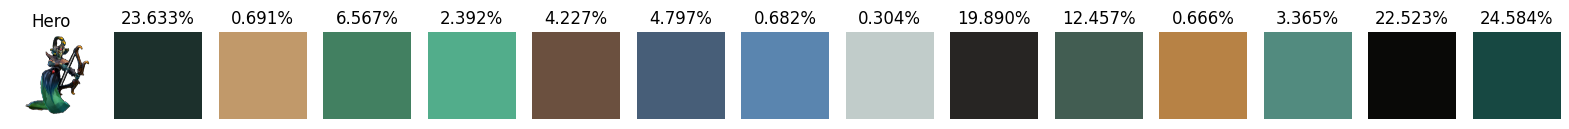

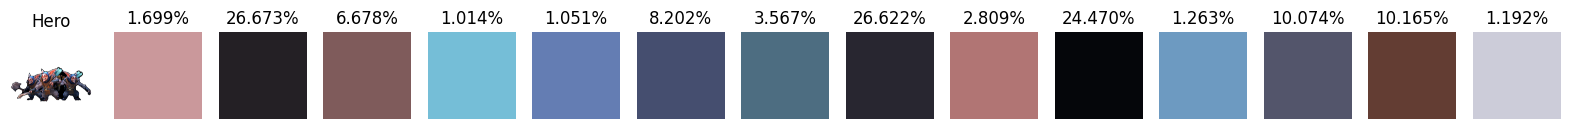

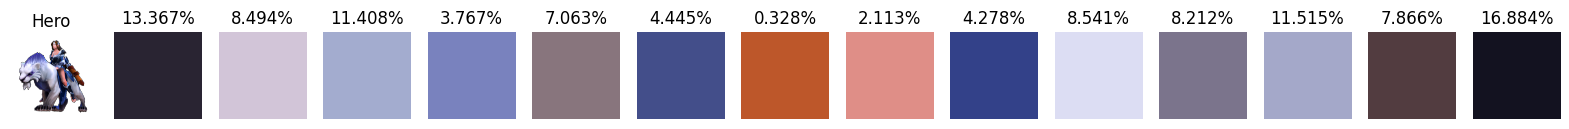

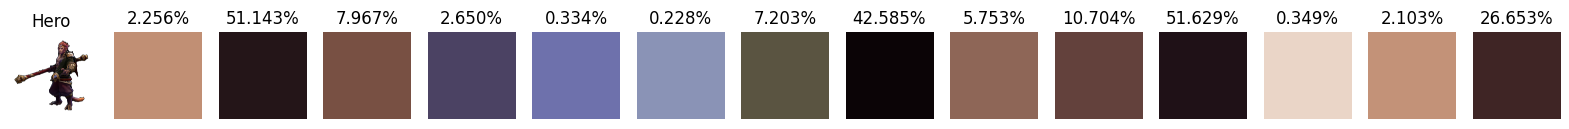

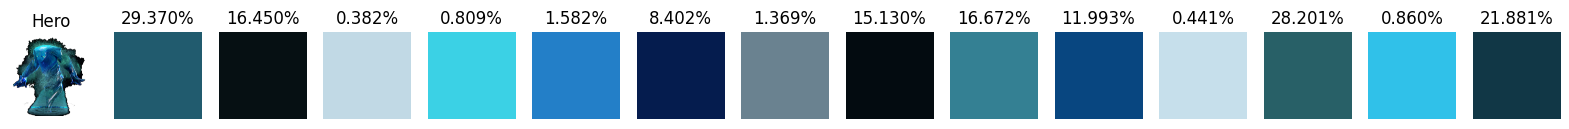

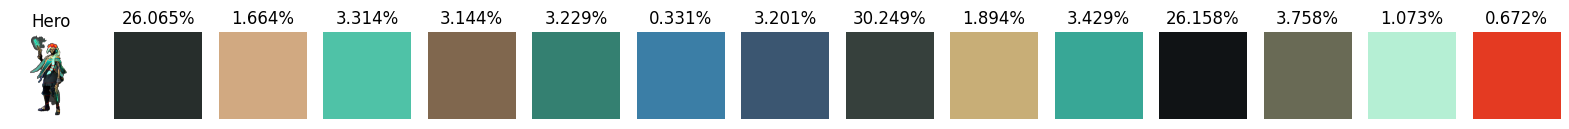

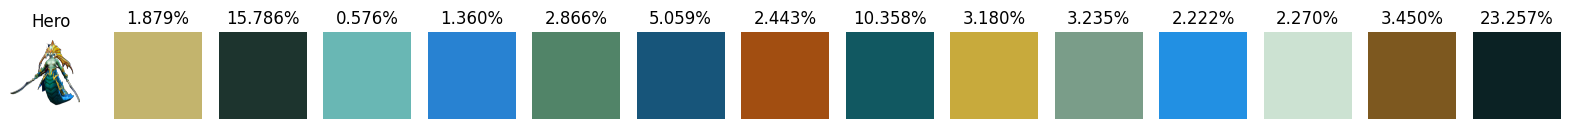

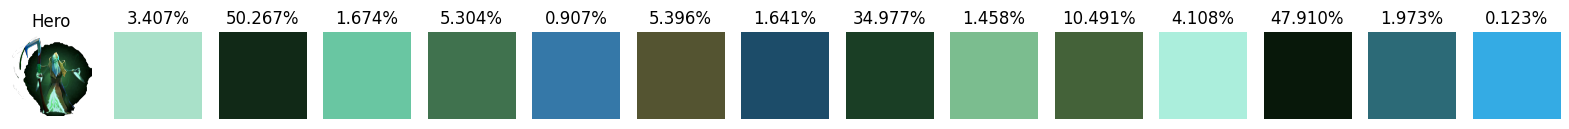

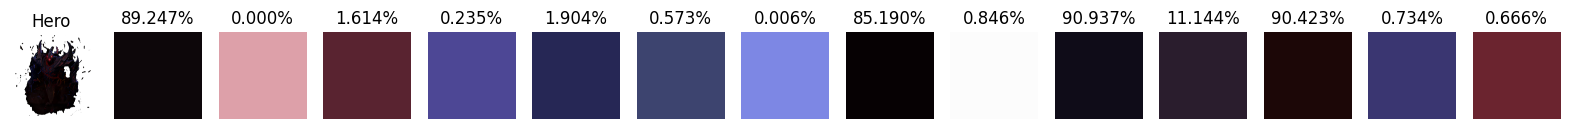

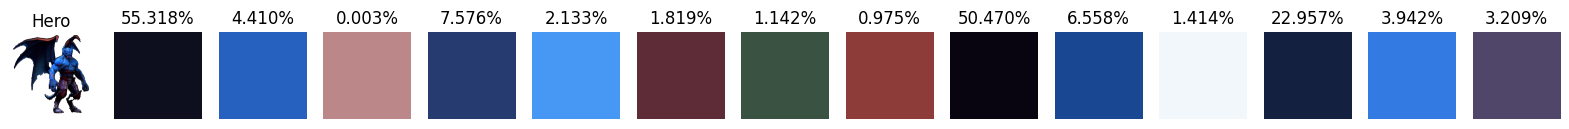

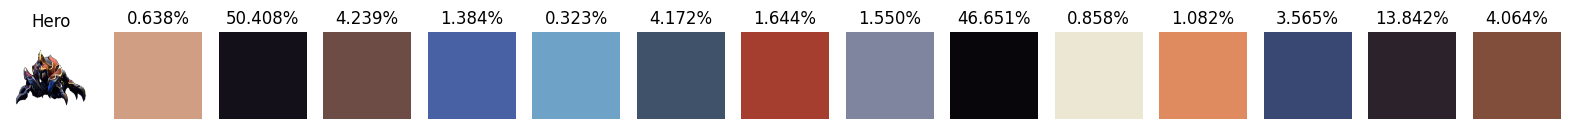

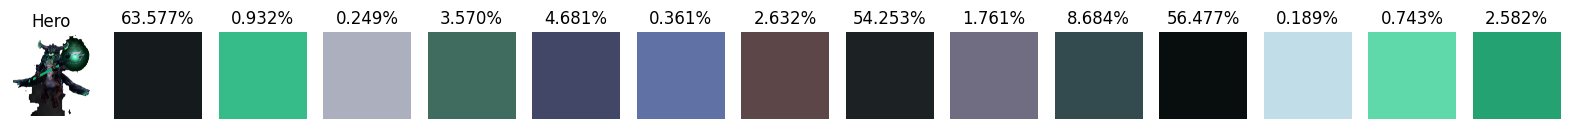

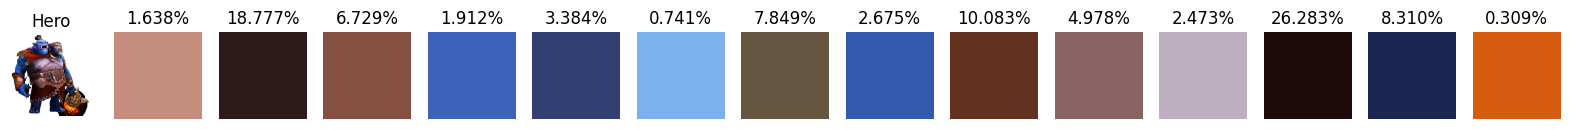

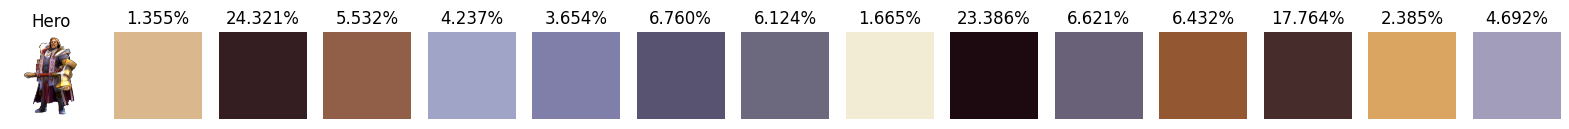

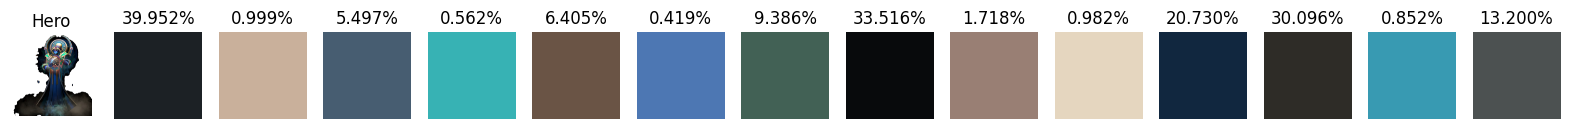

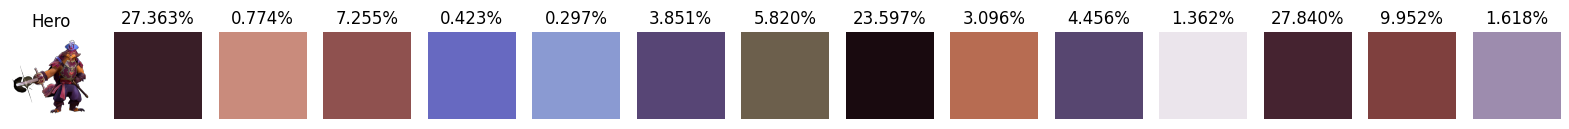

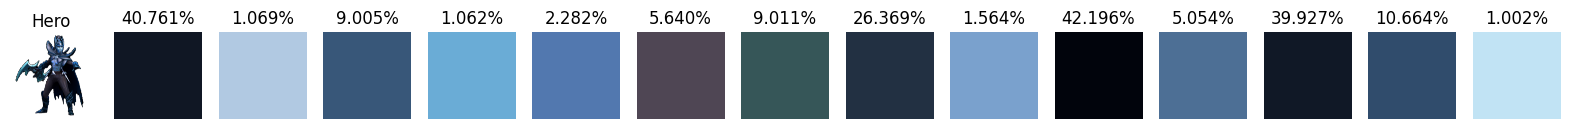

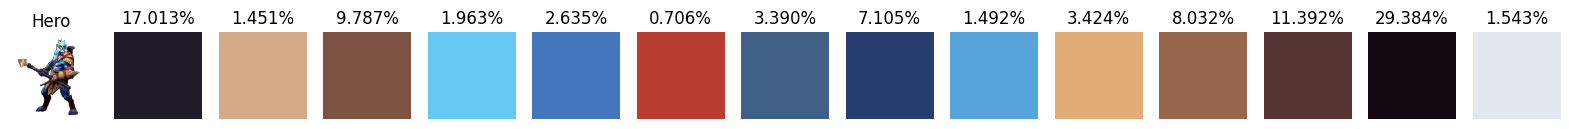

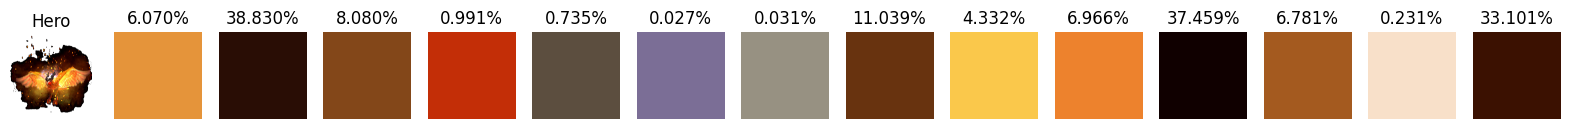

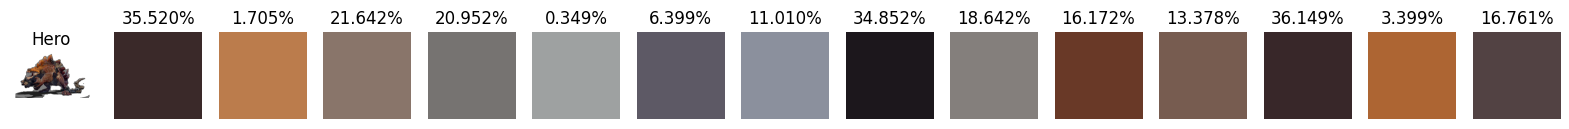

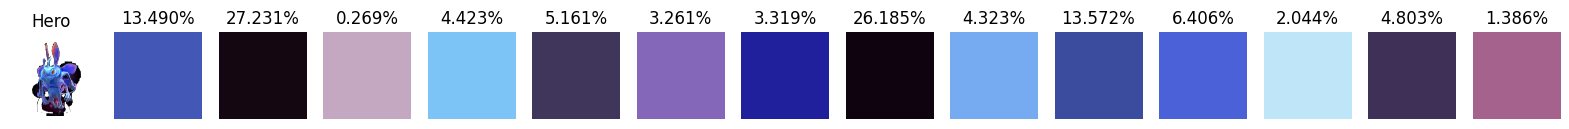

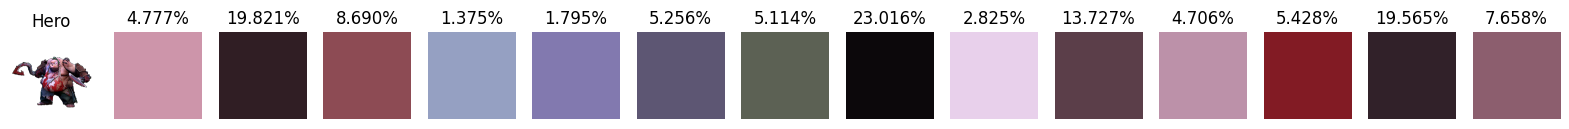

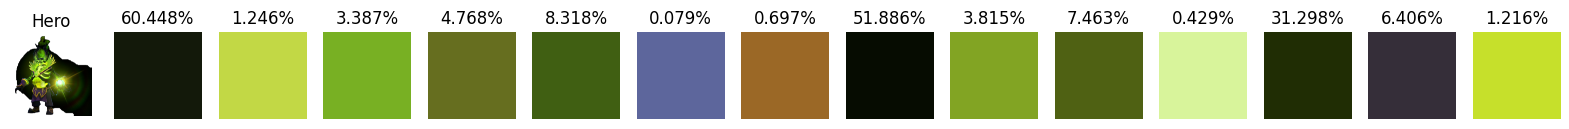

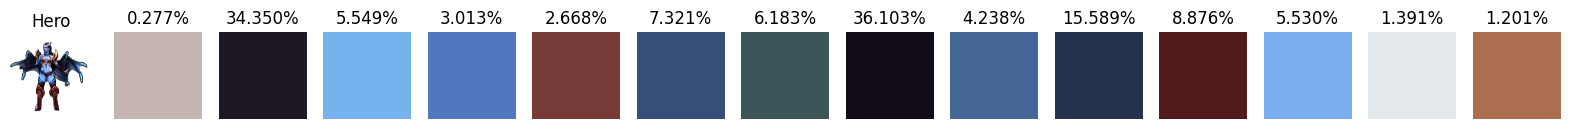

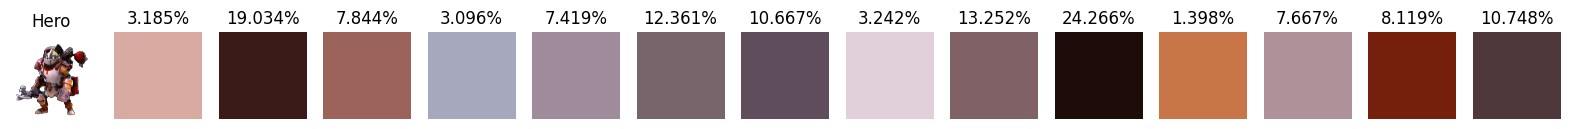

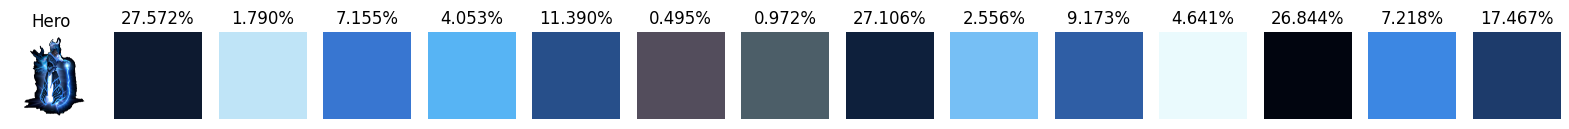

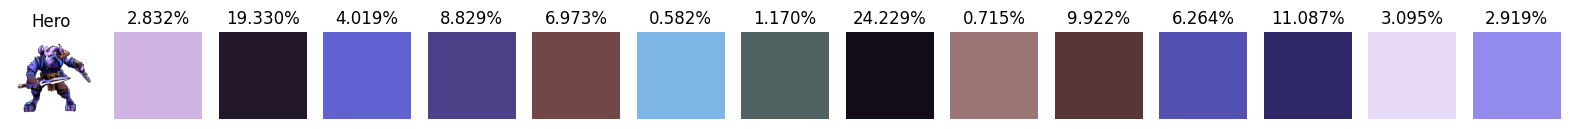

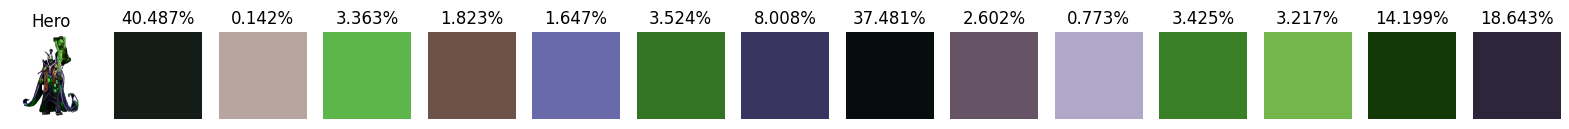

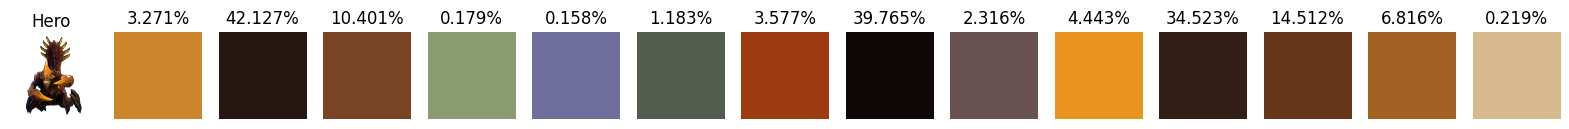

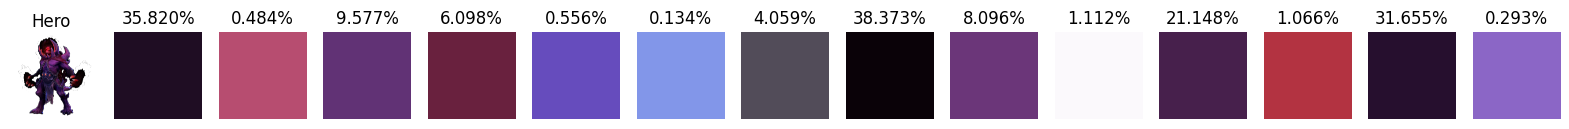

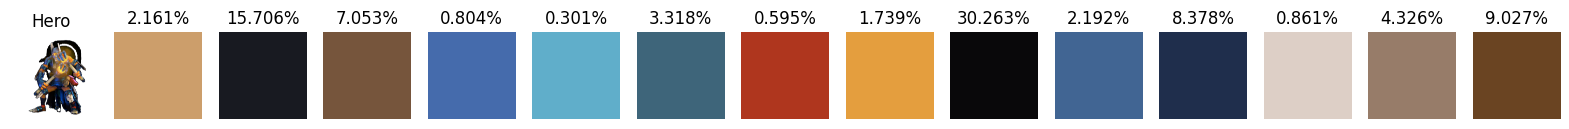

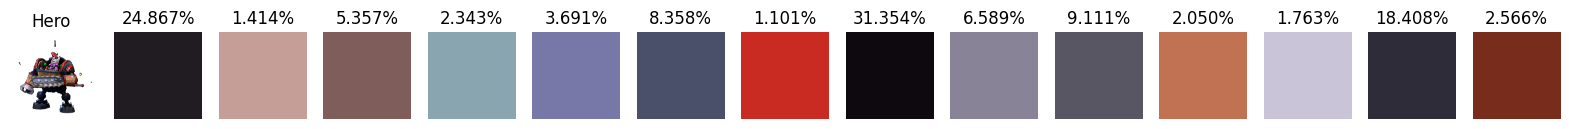

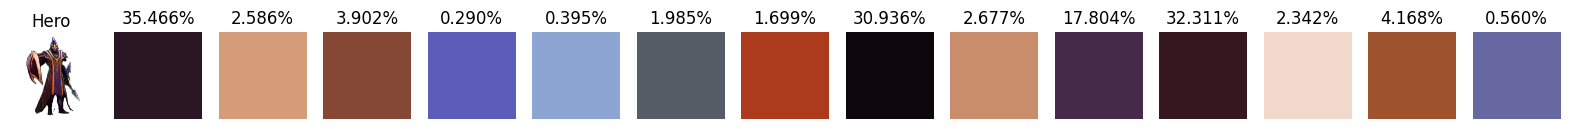

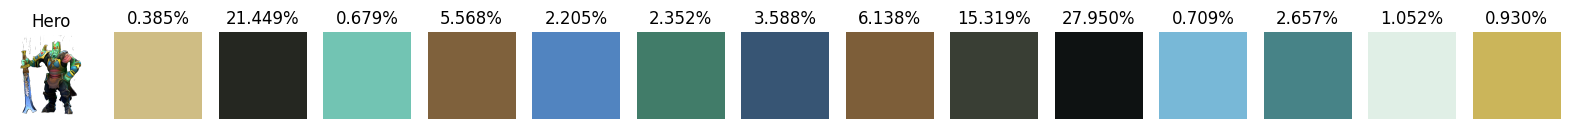

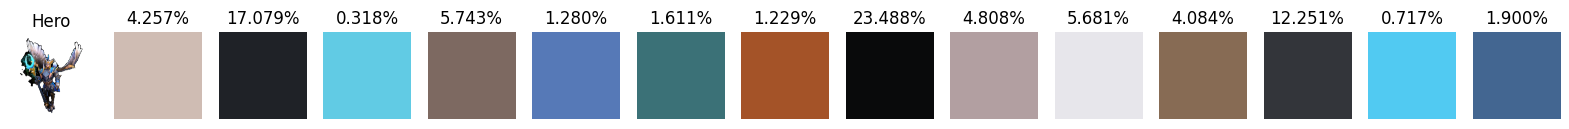

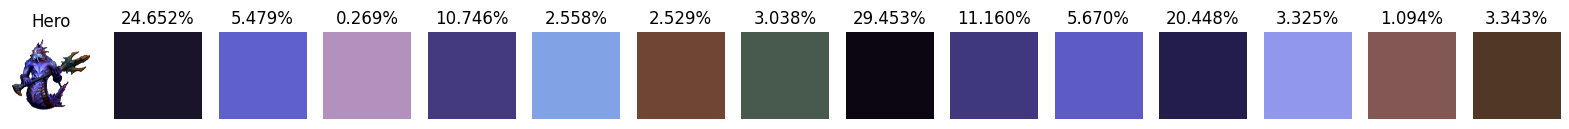

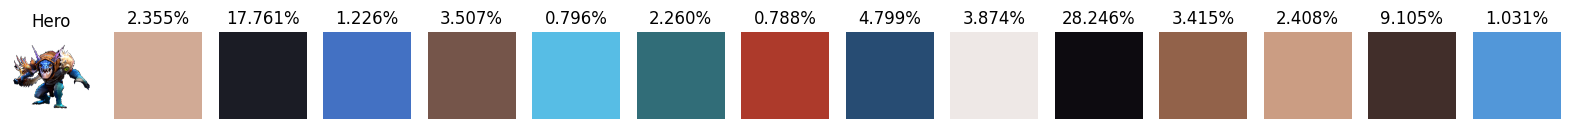

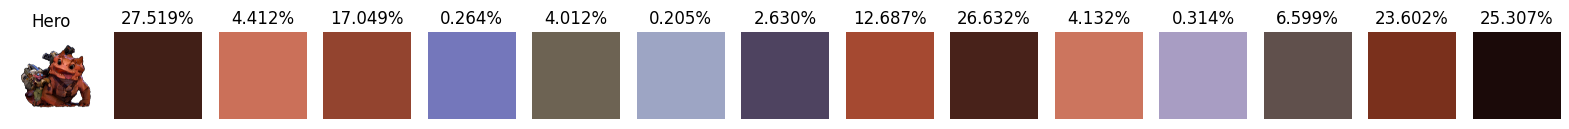

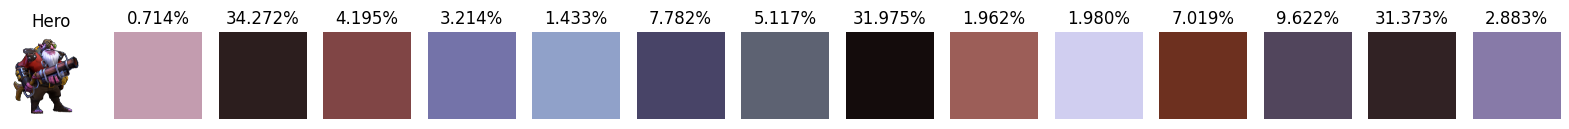

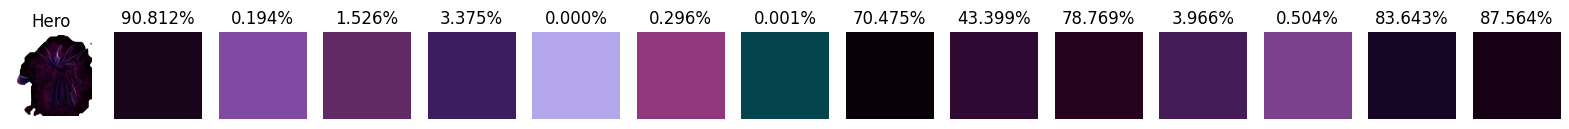

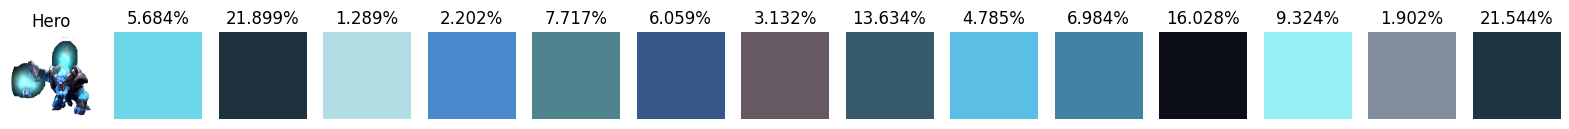

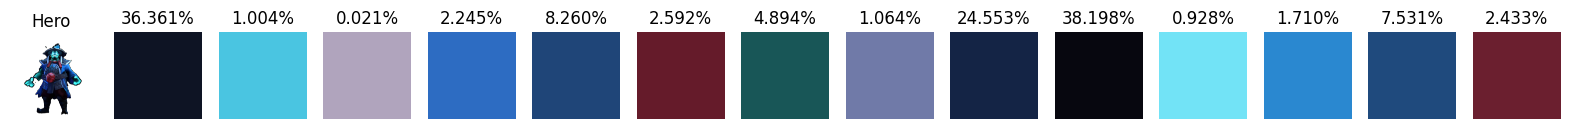

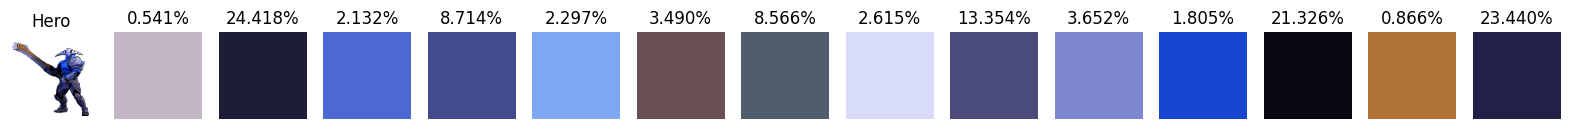

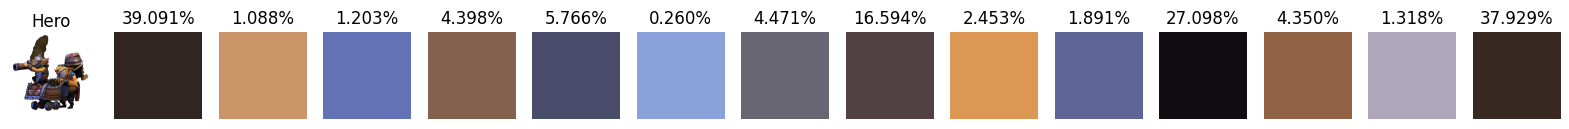

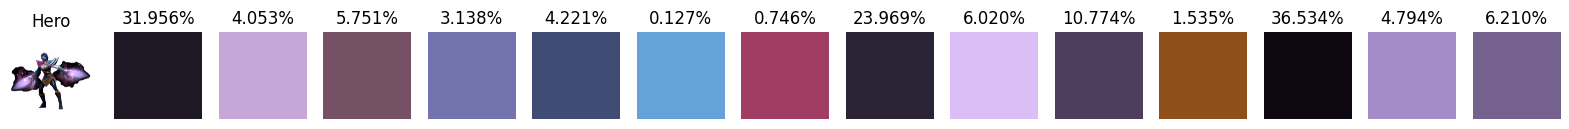

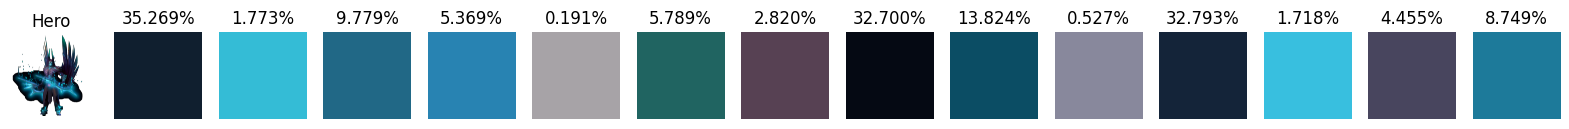

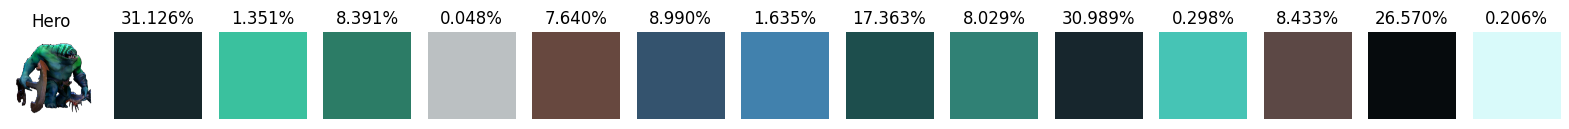

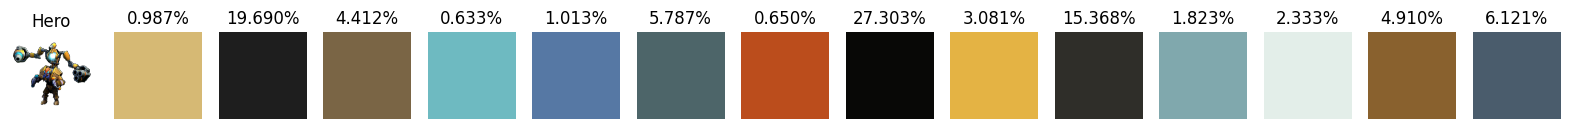

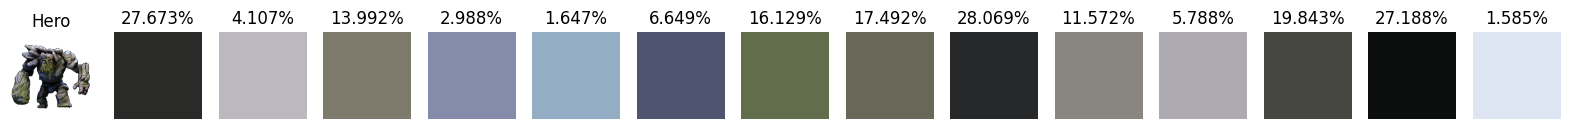

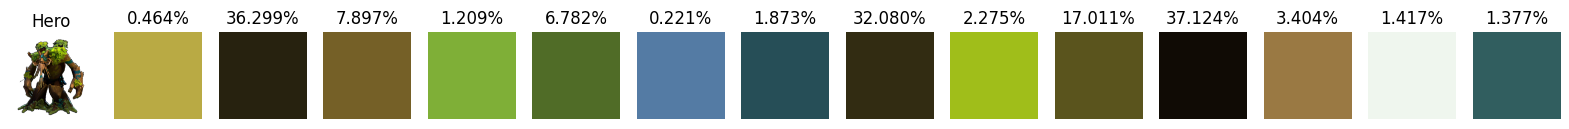

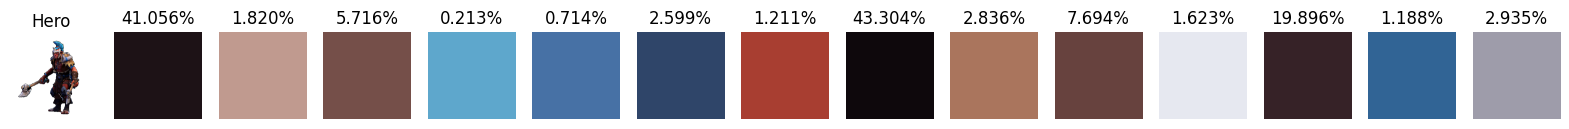

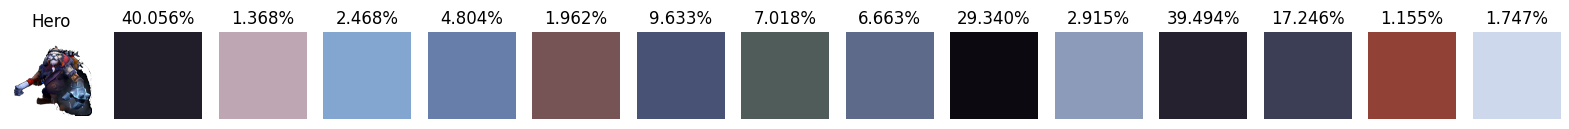

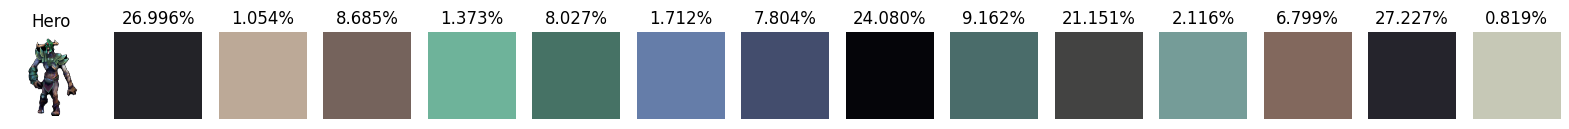

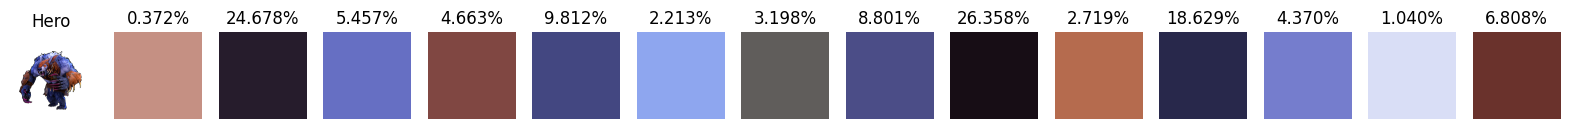

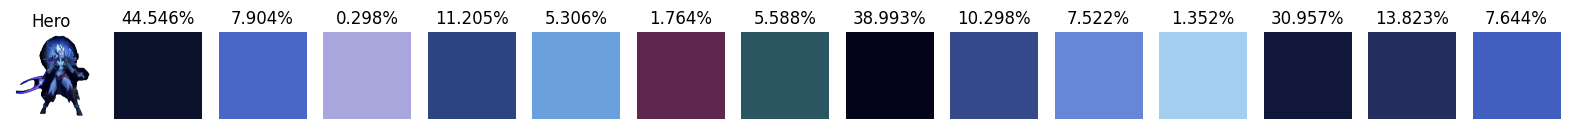

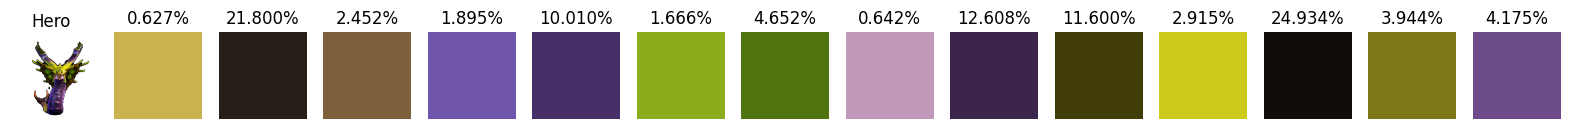

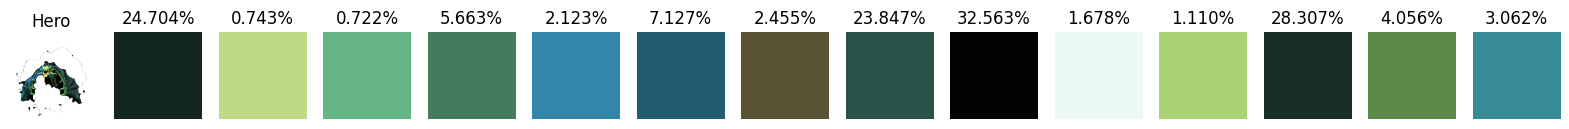

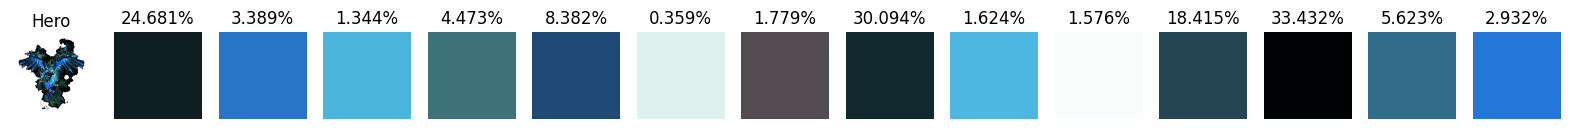

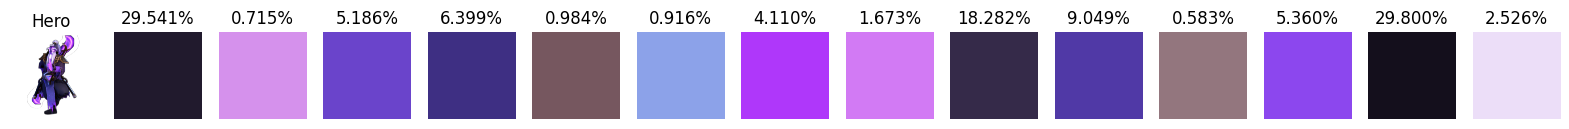

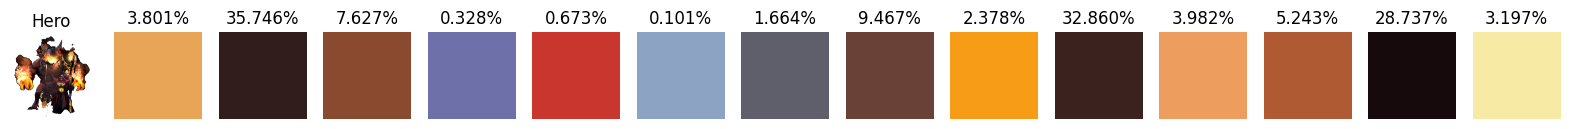

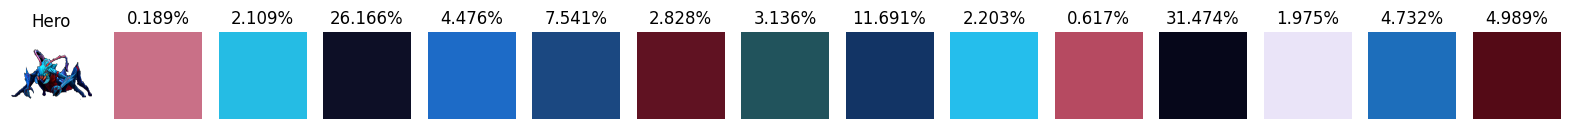

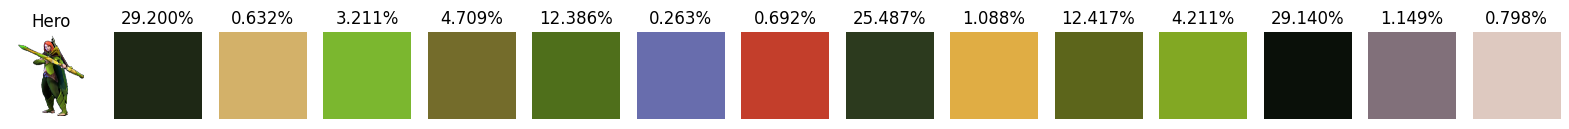

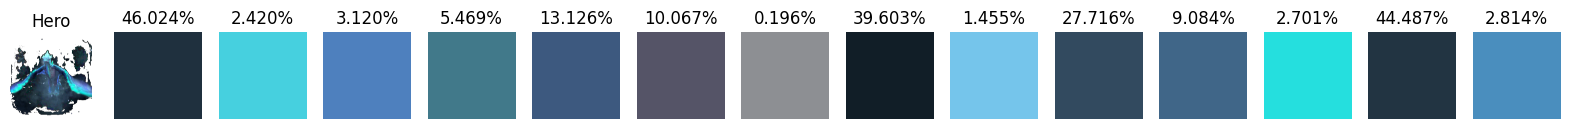

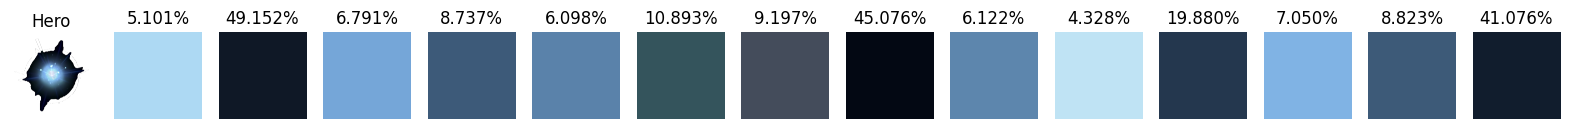

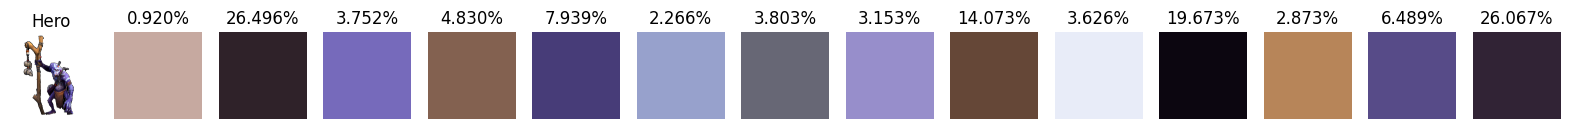

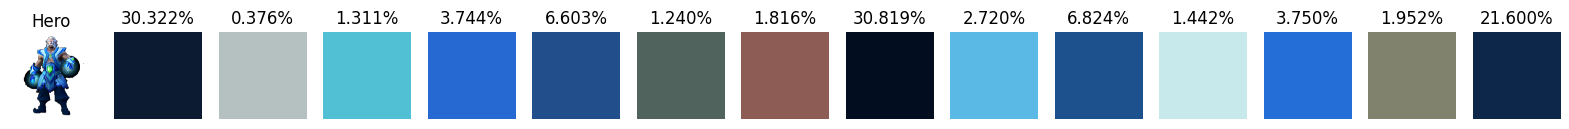

In [3]:
import json
import matplotlib.pyplot as plt
with open('/home/markm/dotaheroestest.json', 'r') as file:
    data = json.load(file)

for hero in data:
    palette = hero["palette_with_percentage"]
    image_path = hero["hero_image_path"]
    plt.figure(figsize=(20, 10 + len(palette) * 4))
    plt.subplot(1, len(palette) + 2, 1)
    plt.imshow(plt.imread(image_path))
    plt.axis('off')
    plt.title('Hero')
    for i, inner_obj in enumerate(palette):
        color = inner_obj[0]
        percentage = inner_obj[1]


        plt.subplot(1, len(palette) + 1, i + 2)
        plt.imshow([[color]])
        plt.axis('off')
        title = f"{percentage:.3f}%"
        plt.title(title)
    plt.show()


# Print Hero Colour Cards

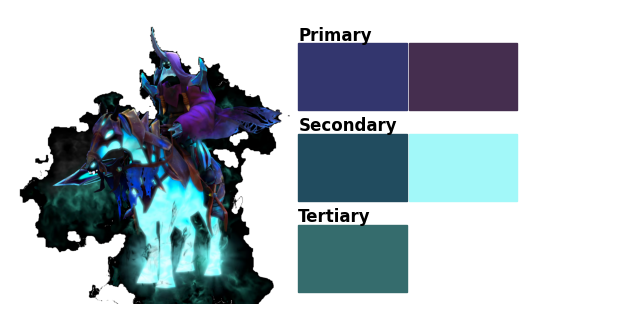

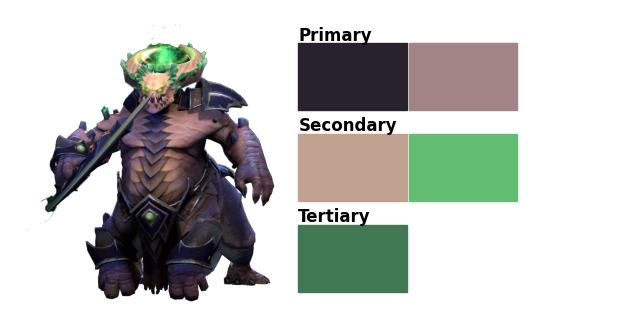

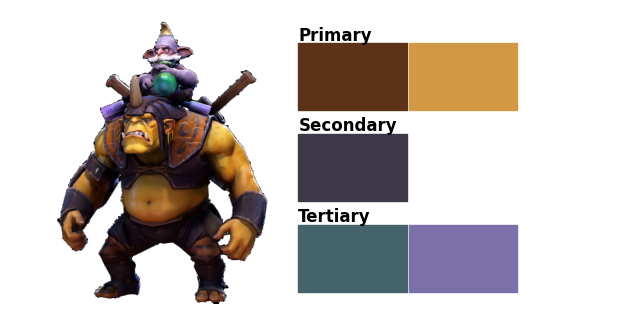

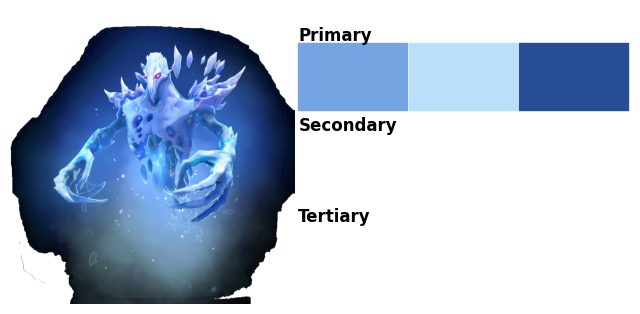

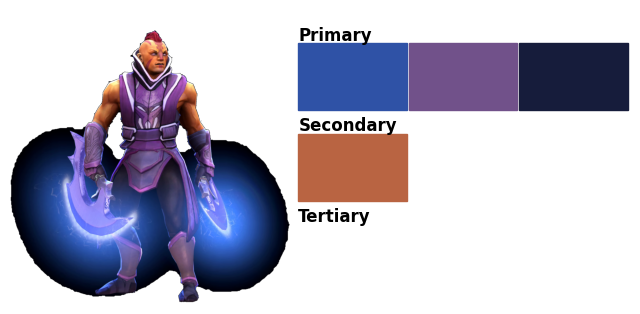

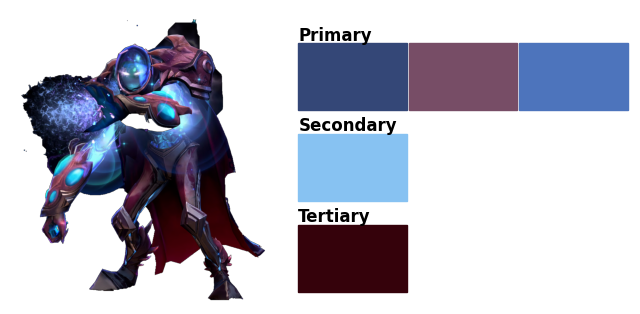

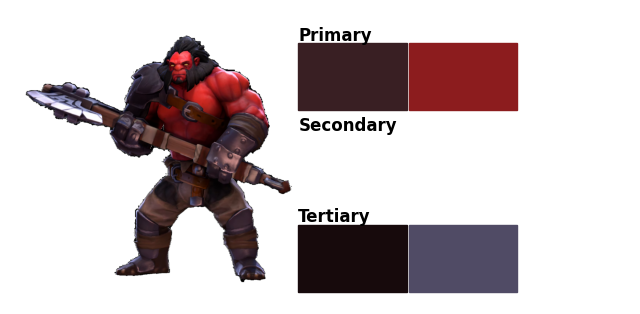

KeyError: 'primary_colours'

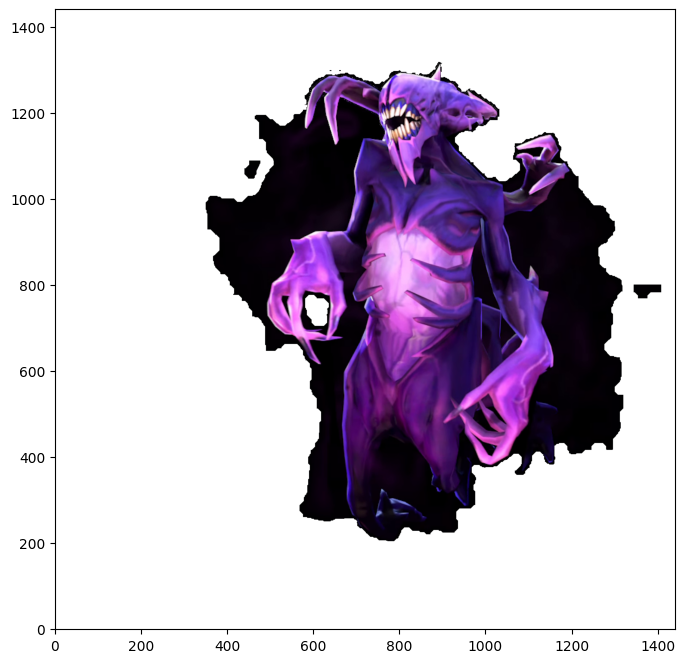

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

def plot_colour_scheme_card(hero_data):
    # Load hero image
    hero_image_path = hero_data['hero_image_path']
    img = mpimg.imread(hero_image_path)
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(8, 10))  # Adjust figure size if necessary
    
    # Display hero image
    ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    
    # Adjustments for colour boxes to be more rectangular and add padding
    colour_box_width = 550  # Increased width for more rectangular shape
    colour_box_height = img.shape[0] // 4 - 20  # Decrease height and add vertical padding
    vertical_padding = 60
    
    # Define starting position for colour boxes (with some horizontal padding from the image)
    x_start = img.shape[1] + 20
    y_start = img.shape[0]
    
    # Function to draw colour boxes and add titles
    def draw_colour_boxes_and_titles(colours, y_start, title):
        # Add title above the colour boxes
        ax.text(x_start, y_start - 45, title, fontsize=12, fontweight='bold')
        
        # Draw the colour boxes with some vertical padding between them
        for i, colour in enumerate(colours):
            ax.add_patch(Rectangle((x_start + i * (colour_box_width + 10), y_start - colour_box_height - vertical_padding),
                                   colour_box_width, colour_box_height,
                                   color=[c/255 for c in colour]))
    
    # Draw primary, secondary, and tertiary colour boxes with titles
    draw_colour_boxes_and_titles(hero_data['primary_colours'], y_start - vertical_padding, 'Primary')
    draw_colour_boxes_and_titles(hero_data['secondary_colours'], y_start - colour_box_height - 3 * vertical_padding, 'Secondary')
    draw_colour_boxes_and_titles(hero_data['tertiary_colours'], y_start - 2 * colour_box_height - 5 * vertical_padding, 'Tertiary')
    
    # Adjust axes and show plot
    ax.set_xlim([0, x_start + 3 * (colour_box_width + 10)])
    ax.set_ylim([0, img.shape[0] + 50])  # Adjust ylim to fit titles
    ax.axis('off')  # Hide axes
    plt.show()

# Example data (ensure the 'hero_image_path' is correctly set to your hero image's file path)

with open('./dotaheroestest.json', 'r') as file:
    hero_data = json.load(file)

for hero in hero_data:
    plot_colour_scheme_card(hero)


In [2]:
# Printing colour scheme and hero card for a specific hero
#def print_hero_colours(directory, name):
    
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

def get_hero_by_name(data, name):
    for obj in data:
        if obj.get("name") == name:
            return obj
    return None  # Return None if no match is found

def plot_colour_scheme_card(hero_data):
    # Load hero image
    hero_image_path = hero_data['hero_image_path']
    img = mpimg.imread(hero_image_path)
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(13, 13))  # Adjust figure size if necessary
    
    # Display hero image
    ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    
    # Adjustments for colour boxes to be more rectangular and add padding
    colour_box_width = 550  # Increased width for more rectangular shape
    colour_box_height = img.shape[0] // 4 - 20  # Decrease height and add vertical padding
    vertical_padding = 60
    
    # Define starting position for colour boxes (with some horizontal padding from the image)
    x_start = img.shape[1] + 20
    y_start = img.shape[0]
    
    # Function to draw colour boxes and add titles
    def draw_colour_boxes_and_titles(colours, y_start, title):
        # Add title above the colour boxes
        ax.text(x_start, y_start - 45, title, fontsize=12, fontweight='bold')
        
        # Draw the colour boxes with some vertical padding between them
        for i, colour in enumerate(colours):
            ax.add_patch(Rectangle((x_start + i * (colour_box_width + 10), y_start - colour_box_height - vertical_padding),
                                   colour_box_width, colour_box_height,
                                   color=[c/255 for c in colour]))
    
    # Draw primary, secondary, and tertiary colour boxes with titles
    draw_colour_boxes_and_titles(hero_data['primary_colours'], y_start - vertical_padding, 'Primary')
    draw_colour_boxes_and_titles(hero_data['secondary_colours'], y_start - colour_box_height - 3 * vertical_padding, 'Secondary')
    draw_colour_boxes_and_titles(hero_data['tertiary_colours'], y_start - 2 * colour_box_height - 5 * vertical_padding, 'Tertiary')
    
    # Adjust axes and show plot
    ax.set_xlim([0, x_start + 3 * (colour_box_width + 10)])
    ax.set_ylim([0, img.shape[0] + 50])  # Adjust ylim to fit titles
    ax.axis('off')  # Hide axes
    plt.show()

def print_colour_calculations(hero):
    palette = hero["palette_with_percentage"]
    image_path = hero["hero_image_path"]
    plt.figure(figsize=(20, 10 + len(palette) * 4))
    plt.subplot(1, len(palette) + 2, 1)
    plt.imshow(plt.imread(image_path))
    plt.axis('off')
    plt.title('Hero')
    for i, inner_obj in enumerate(palette):
        color = inner_obj[0]
        percentage = inner_obj[1]


        plt.subplot(1, len(palette) + 1, i + 2)
        plt.imshow([[color]])
        plt.axis('off')
        title = f"{percentage:.3f}%"
        plt.title(title)
    plt.show()

def hero_details(name):
    with open('./dotaheroestest.json', 'r') as file:
        hero_data = json.load(file)
    hero_object = get_hero_by_name(hero_data, name)
    print_colour_calculations(hero_object)
    plot_colour_scheme_card(hero_object)


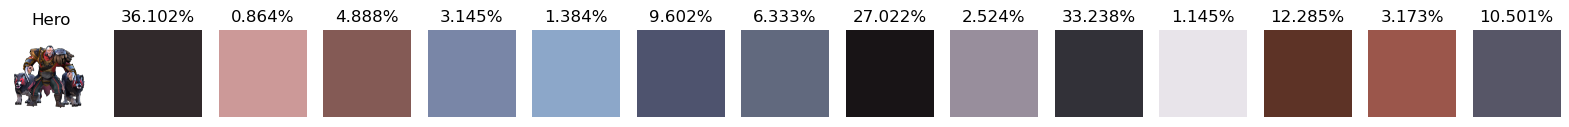

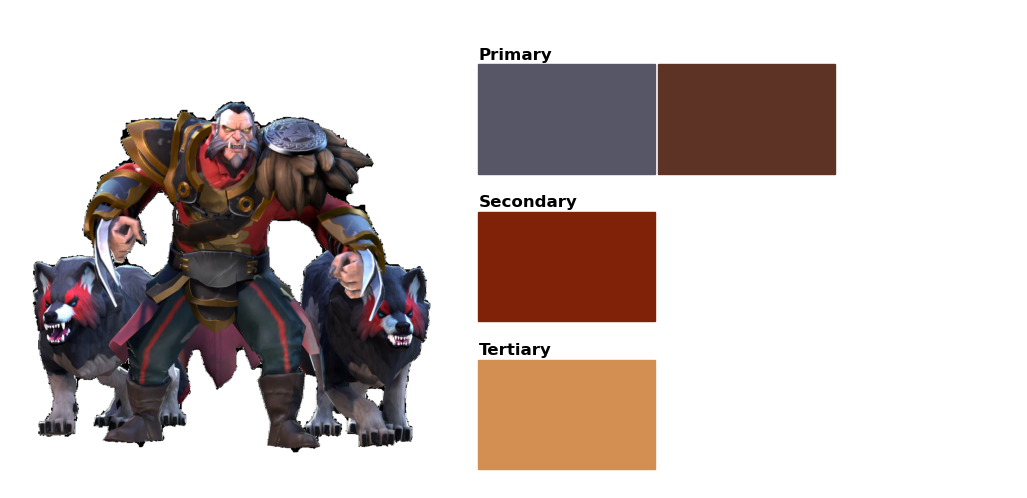

In [3]:
hero_details("lycan")